# Import required libraries

In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load csv file

In [319]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

# 2. Explore data

In [320]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## 1) Total records

In [322]:
len(df)

5110

## 2) Null count

In [323]:
#checking null values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## 3) Mean, median, std-dev for each numerical column

In [324]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [325]:
numeric_cols=['id','age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']
for col in numeric_cols:
    print("\nFor column:",col)
    print("Mean:",df[col].mean())
    print("Median:",df[col].median())
    print("Std dev:",df[col].std())
    


For column: id
Mean: 36517.82935420744
Median: 36932.0
Std dev: 21161.721624827165

For column: age
Mean: 43.226614481409
Median: 45.0
Std dev: 22.61264672311349

For column: hypertension
Mean: 0.0974559686888454
Median: 0.0
Std dev: 0.29660667423379117

For column: heart_disease
Mean: 0.05401174168297456
Median: 0.0
Std dev: 0.22606298750336543

For column: avg_glucose_level
Mean: 106.1476771037182
Median: 91.88499999999999
Std dev: 45.28356015058198

For column: bmi
Mean: 28.893236911794666
Median: 28.1
Std dev: 7.854066729680164

For column: stroke
Mean: 0.0487279843444227
Median: 0.0
Std dev: 0.2153198569802376


# 1. Plot charts 

<AxesSubplot:xlabel='age', ylabel='Count'>

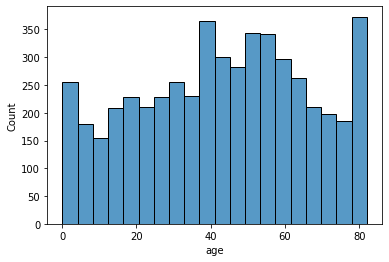

In [326]:
sns.histplot(data=df, x="age")

# The below histplot shows that the highest number of the data points for age attribute lie in the 40-60 range 
# and there is also a high count for age=80

<AxesSubplot:xlabel='stroke', ylabel='count'>

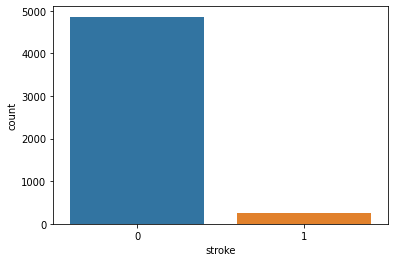

In [327]:
sns.countplot(data=df,x='stroke')
# The below count plot shows that the target variable-stroke does not have a balanced count in the dataset as very few data points have stroke=1
# and most of the data points have stroke=0 which can cause the model to be biased towards the 'no stroke' (0) class

<AxesSubplot:xlabel='work_type', ylabel='count'>

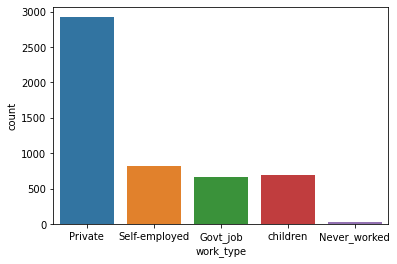

In [328]:
sns.countplot(data=df, x="work_type")
# The count plot shown below gives the categorical distribution for the work_type attribute 
# and we can see that most of the data points are in the 'private' category

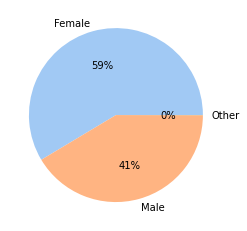

In [329]:
count_female=df['gender'].value_counts()[0]
count_male=df['gender'].value_counts()[1]
count_other=df['gender'].value_counts()[2]

data=[count_female,count_male,count_other]
labels=['Female','Male','Other']

colors=sns.color_palette('pastel')

#create pie chart
plt.pie(data,labels=labels,colors=colors,autopct='%.0f%%')
plt.show()

# The below plot shows us the gender distribution in the data.
# Thus, we can observe that there is a higher count of Females (59%) than Males (41%) for the gender attribute, which might affect the model. 


## 2. Check if bmi has null values

In [330]:
df['bmi'].isna().sum()


201

## Percentage of bmi null values

In [331]:
bmi_null_count=df['bmi'].isna().sum()
bmi_count=len(df['bmi'])
percent_null=(bmi_null_count/bmi_count)*100
print(round(percent_null,2),"%")

3.93 %


## Using data engineering method to fill the null values

In [332]:
#using bmi mean to fill null values since it is a continuous attribute
bmi_mean=round(df['bmi'].mean(),2)
print(bmi_mean)

#filling null values
df['bmi']=df['bmi'].fillna(bmi_mean)

28.89


In [333]:
df['bmi'].isna().sum()
#filled null values

0

## 3. Remove outliers

## 1) For bmi numeric column:

C:\Users\svirka\Desktop\DAX-DS-Assignment-2022-Sukhada_Virkar\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


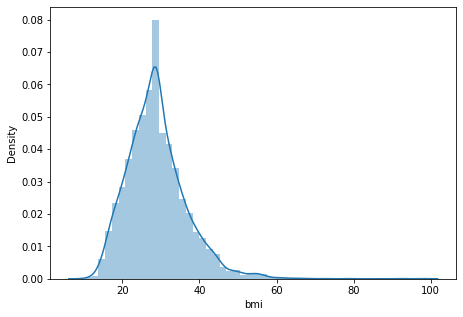

In [334]:
# bmi column distribution
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['bmi'])
plt.show()

C:\Users\svirka\Desktop\DAX-DS-Assignment-2022-Sukhada_Virkar\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

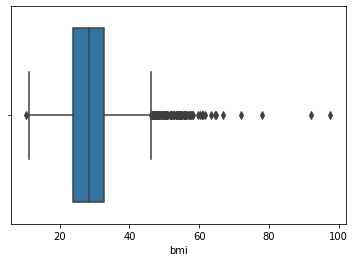

In [335]:
# checking box plot to detect outliers
sns.boxplot(df['bmi'])

In [336]:
# we can see using above box plot that there are a lot of outliers after bmi=50
mean=np.mean(df['bmi'])
std=np.std(df['bmi'])
print('Mean is',mean)
print('Std-dev is',std)

Mean is 28.893109589041092
Std-dev is 7.69726458501385


## Using Z-score to remove outliers

In [337]:
threshold=3
outlier=[]

for i in df['bmi']:
    z=(i-mean)/std
    if z>threshold:
        outlier.append(i)
           
print('Outliers in dataset are:',outlier)
print("Outlier start point:",min(outlier))

Outliers in dataset are: [56.6, 54.6, 60.9, 54.7, 64.8, 54.7, 60.2, 71.9, 54.6, 55.7, 55.7, 57.5, 54.2, 52.3, 78.0, 53.4, 55.2, 55.0, 54.8, 52.8, 66.8, 55.1, 55.9, 57.3, 56.0, 57.7, 54.0, 56.1, 97.6, 53.9, 53.8, 52.7, 52.8, 55.7, 53.5, 63.3, 52.8, 61.2, 58.1, 52.7, 53.4, 59.7, 52.5, 52.9, 54.7, 61.6, 53.8, 54.3, 55.0, 57.2, 64.4, 92.0, 55.9, 57.9, 55.7, 57.2, 60.9, 54.1, 56.6]
Outlier start point: 52.3


In [338]:
df['bmi'].shape

(5110,)

In [339]:
outlier_start_point=min(outlier)

#removing outliers 
new_df = df[df['bmi'] <= outlier_start_point ]

In [340]:
#checking shape after outlier removal
new_df['bmi'].shape

(5052,)

C:\Users\svirka\Desktop\DAX-DS-Assignment-2022-Sukhada_Virkar\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


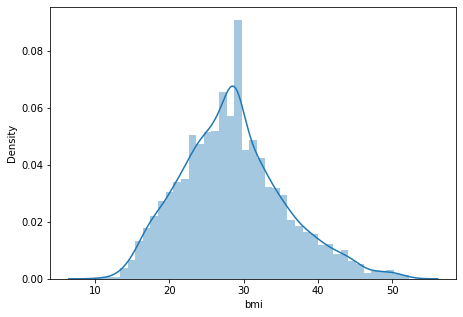

In [341]:
#bmi column distribution after removing outliers
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_df['bmi'])
plt.show()

## 2) Removing outliers for avg_glucose_level column

C:\Users\svirka\Desktop\DAX-DS-Assignment-2022-Sukhada_Virkar\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


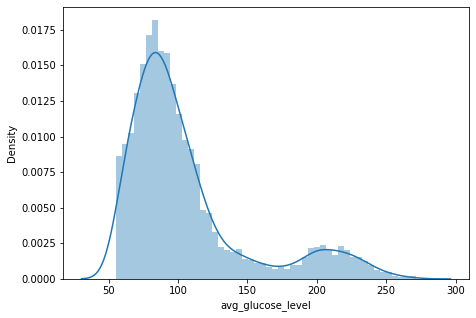

In [342]:
# avg_glucose_level column distribution
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_df['avg_glucose_level'])
plt.show()

C:\Users\svirka\Desktop\DAX-DS-Assignment-2022-Sukhada_Virkar\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

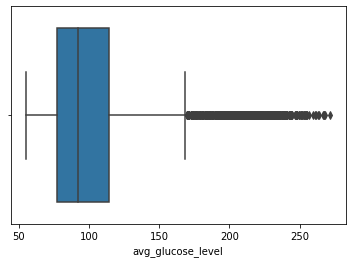

In [343]:
# checking box plot to detect outliers
sns.boxplot(new_df['avg_glucose_level'])

In [344]:
# we can see using above box plot that there are a lot of outliers 
mean=np.mean(new_df['avg_glucose_level'])
std=np.std(new_df['avg_glucose_level'])
print('Mean is',mean)
print('Std-dev is',std)

Mean is 105.96277513855898
Std-dev is 45.05584059226029


## Using Z-score to remove outliers

In [345]:
threshold=3
outlier=[]

for i in new_df['avg_glucose_level']:
    z=(i-mean)/std
    if z>threshold:
        outlier.append(i)
           
print('Outliers in dataset are:',outlier)
print("Outlier start point:",min(outlier))

Outliers in dataset are: [252.72, 243.58, 259.63, 249.31, 263.32, 271.74, 242.52, 250.89, 247.51, 243.53, 242.3, 243.5, 251.6, 247.69, 250.2, 254.6, 254.63, 246.34, 251.46, 267.76, 246.53, 244.28, 251.99, 253.16, 242.84, 249.29, 242.94, 247.48, 266.59, 243.73, 243.59, 250.8, 255.17, 267.61, 260.85, 248.37, 263.56, 247.97, 248.24, 253.93, 254.95, 247.87, 261.67, 256.74, 244.3, 242.62, 243.52, 267.6, 253.86]
Outlier start point: 242.3


In [346]:
new_df['avg_glucose_level'].shape

(5052,)

In [347]:
outlier_start_point=min(outlier)

#removing outliers 
df_new = new_df[new_df['avg_glucose_level'] <= outlier_start_point ]

In [348]:
#checking shape after outlier removal
df_new['avg_glucose_level'].shape

(5004,)

C:\Users\svirka\Desktop\DAX-DS-Assignment-2022-Sukhada_Virkar\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


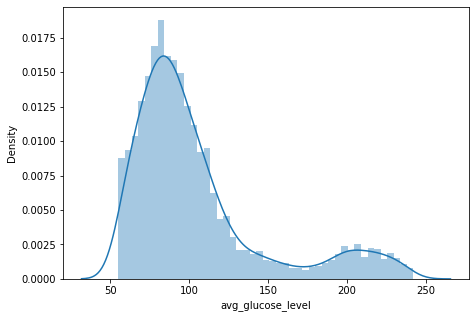

In [349]:
#avg_glucose_level column distribution after removing outliers
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_new['avg_glucose_level'])
plt.show()

## 4. Perform scaling on all numerical columns

In [350]:
# Using min-max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#scaling all numeric columns
df_new[numeric_cols]=scaler.fit_transform(df_new[numeric_cols])

df_new.head()

C:\Users\svirka\AppData\Local\Temp\ipykernel_17348\582356504.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[numeric_cols]=scaler.fit_transform(df_new[numeric_cols])


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,Male,0.816895,0.0,1.0,Yes,Private,Urban,0.927289,0.626190,formerly smoked,1.0
1,0.708205,Female,0.743652,0.0,0.0,Yes,Self-employed,Rural,0.785821,0.442619,never smoked,1.0
2,0.426015,Male,0.975586,0.0,1.0,Yes,Private,Rural,0.271397,0.528571,never smoked,1.0
3,0.824928,Female,0.597168,0.0,0.0,Yes,Private,Urban,0.620312,0.573810,smokes,1.0
4,0.021929,Female,0.963379,1.0,0.0,Yes,Self-employed,Rural,0.635752,0.326190,never smoked,1.0


## 5. Perform Encoding on all categorical columns

In [351]:
df_new.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [352]:
#using label encoder for binary categorical columns
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

binary_categ_cols=['hypertension','heart_disease','ever_married','Residence_type','gender']

df_new['hypertension']=lb.fit_transform(df_new['hypertension'])
df_new['heart_disease']=lb.fit_transform(df_new['heart_disease'])
df_new['ever_married']=lb.fit_transform(df_new['ever_married'])
df_new['Residence_type']=lb.fit_transform(df_new['Residence_type'])
df_new['gender']=lb.fit_transform(df_new['gender'])


C:\Users\svirka\AppData\Local\Temp\ipykernel_17348\2103785846.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['hypertension']=lb.fit_transform(df_new['hypertension'])
C:\Users\svirka\AppData\Local\Temp\ipykernel_17348\2103785846.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['heart_disease']=lb.fit_transform(df_new['heart_disease'])
C:\Users\svirka\AppData\Local\Temp\ipykernel_17348\2103785846.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [353]:
df_new.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,1,0.816895,0,1,1,Private,1,0.927289,0.626190,formerly smoked,1.0
1,0.708205,0,0.743652,0,0,1,Self-employed,0,0.785821,0.442619,never smoked,1.0
2,0.426015,1,0.975586,0,1,1,Private,0,0.271397,0.528571,never smoked,1.0
3,0.824928,0,0.597168,0,0,1,Private,1,0.620312,0.573810,smokes,1.0
4,0.021929,0,0.963379,1,0,1,Self-employed,0,0.635752,0.326190,never smoked,1.0


In [354]:
# Using one hot encoding for categorical columns with more than 2 categories
categ_cols=['work_type','smoking_status']
df_enc= pd.get_dummies(df_new, columns = categ_cols)
print(df_enc)


            id  gender       age  hypertension  heart_disease  ever_married  \
0     0.123214       1  0.816895             0              1             1   
1     0.708205       0  0.743652             0              0             1   
2     0.426015       1  0.975586             0              1             1   
3     0.824928       0  0.597168             0              0             1   
4     0.021929       0  0.963379             1              0             1   
...        ...     ...       ...           ...            ...           ...   
5105  0.249297       0  0.975586             1              0             1   
5106  0.614850       0  0.987793             0              0             1   
5107  0.269730       0  0.426270             0              0             1   
5108  0.514278       1  0.621582             0              0             1   
5109  0.612188       0  0.536133             0              0             1   

      Residence_type  avg_glucose_level       bmi  

In [357]:
df_enc.head()



,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.123214,1,0.816895,0,1,1,1,0.927289,0.626190,1.0,0,0,1,0,0,0,1,0,0
1,0.708205,0,0.743652,0,0,1,0,0.785821,0.442619,1.0,0,0,0,1,0,0,0,1,0
2,0.426015,1,0.975586,0,1,1,0,0.271397,0.528571,1.0,0,0,1,0,0,0,0,1,0
3,0.824928,0,0.597168,0,0,1,1,0.620312,0.573810,1.0,0,0,1,0,0,0,0,0,1
4,0.021929,0,0.963379,1,0,1,0,0.635752,0.326190,1.0,0,0,0,1,0,0,0,1,0


In [358]:
df_enc.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [360]:
df_enc.to_csv("healthcare_stroke_data_updated.csv",index=False)